# MTH9879 Homework 7

Assigned: March 29, 2016.
Due: April 12, 2016 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

# Biya Wu

### 0. (0 points) 
Read Sections 4, 5 and 6 of Bouchaud, Farmer and Lillo.

## Long memory

### 1. (6 points)

Consider the long memory process

$$
X_T=\sum_{i=1}^T\,\epsilon_i
$$

with autocovariance function $\gamma(\tau)=\E[\epsilon_i\,\epsilon_{i-\tau}] \sim \tau^{-\alpha}$.  Show that as $\tau \to \infty$,

$$
\Var[X_{t+\tau}-X_t] \sim \tau ^{2\,H}
$$

where the Hurst exponent $H$ is given by

$$
H=1-\frac{\alpha}{2}.
$$

#### Answer

$\Var[X_{t+\tau}-X_t] = \Var[\sum_{i=t+1}^{t+\tau} \epsilon_i] = \tau \Var[\epsilon]  + \sum_{i \neq j} \Cov(\epsilon_i, \epsilon_j) = \Var[\epsilon](\tau +2\sum_{\tau > i > j >0}(i-j)^{-\alpha}) $ <br\>

$\sum_{\tau > i > j >0}(i-j)^{-\alpha} \sim \int_{0}^{\tau} dy \int_{y}^{\tau} (x-y)^{-\alpha} dx =
\int_{0}^{\tau} \frac{(\tau - y)^{1-\alpha}}{1-\alpha} dy = \frac{\tau^{2-\alpha}}{(1-\alpha)(2-\alpha)}$<br\>

Because $\alpha$ is small, we can deem that the latter term make the most difference, so $\Var[X_{t+\tau}-X_t]\sim \tau^{2-\alpha} => 2H  = 2 - \alpha => H=1-\frac {\alpha}{2}$

## MSFT data from Alejandro Ca&ntilde;ete

In [143]:
library(highfrequency)
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/03/MSFT130311.rData_.zip", destfile="MSFT130311.zip")
unzip(zipfile="MSFT130311.zip")
load("MSFT130311.rData")

### 2. (10 points)

(a) Generate the series *tradeSign* of trade signs from the *msft130311.inet* data frame.


In [144]:
tradeSign <- sign(msft130311.inet$signed.shares)


(b) Fit an AR(1) model to the *tradeSign*  data to give the forecast:
    $$
    \hat \epsilon^{(1)}_t=\phi_1\,\epsilon_{t-1}
    $$


In [145]:
res<-ar(tradeSign, order.max = 1)
print(res)


Call:
ar(x = tradeSign, order.max = 1)

Coefficients:
    1  
0.821  

Order selected 1  sigma^2 estimated as  0.3236



(c) How does $\phi_1$ relate to the autocorrelation coefficients of *tradeSign*?  What is the mean-squared error of this AR(1) forecast?


#### Answer

$\phi_1= \Cov(\epsilon_t, \epsilon_{t-1}) \quad \phi_1^2=\Cov(\epsilon_t, \epsilon_{t-2}) \quad ... \,\phi_1^n=\Cov(\epsilon_t, \epsilon_{t-n}) $

In [146]:
print(mean(na.omit(res$resid)^2))

[1] 0.3234549



(d) Fit an $AR(p)$ model to the *tradeSign* data, allowing R to find the best value of $p$ using the default AIC criterion.  This generates the forecast:
    $$
    \hat \epsilon^{(2)}_t=\sum_{k=1}^p\,\phi_k\,\epsilon_{t-k}.
    $$

(e) What value of $p$ is selected by R?  What is the mean-squared error of this AR(p) forecast?


In [147]:
res2<-ar(tradeSign)
print(res2)
cat('\n',"mean-squared error ", mean(na.omit(res2$resid)^2))


Call:
ar(x = tradeSign)

Coefficients:
      1        2        3        4        5        6        7        8  
 0.6962   0.0375   0.0422   0.0186   0.0236   0.0048   0.0002   0.0302  
      9       10       11       12       13       14  
 0.0112  -0.0080   0.0154  -0.0127   0.0237   0.0199  

Order selected 14  sigma^2 estimated as  0.3116

 mean-squared error  0.3105728

### 3. (8 points)

(a) Bin the AR(p) forecast data from the previous problem by forecast sign with bin-breaks from -1.01 to 1.01 in steps of 0.02.


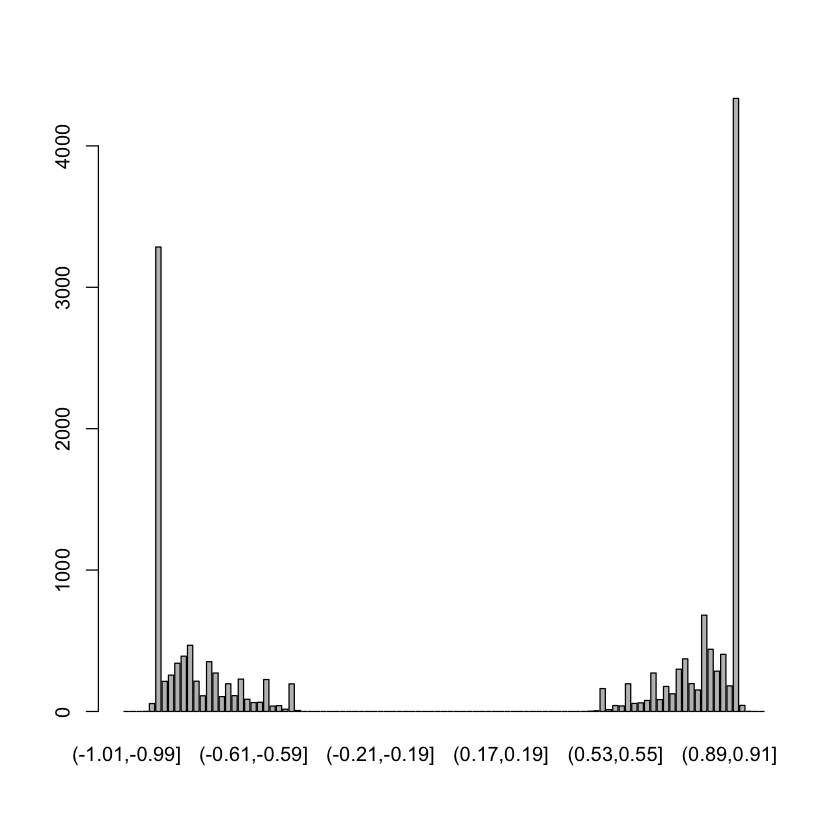

In [148]:
forecast <- tradeSign - res2$resid
forecast.bin<-table(cut(forecast,seq(-1.01,1.01,0.02)))
barplot(forecast.bin)


(b) Plot the average actual order sign in each bin against the average forecast order sign.  What is the slope of the resulting graph? (Hint: use the R function *lm*).




Call:
lm(formula = actural_mean ~ forecast_mean)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46156 -0.01269  0.00005  0.03006  0.11201 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.0009118  0.0086526  -0.105    0.916    
forecast_mean  1.0020282  0.0121321  82.593   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06794 on 61 degrees of freedom
Multiple R-squared:  0.9911,	Adjusted R-squared:  0.991 
F-statistic:  6822 on 1 and 61 DF,  p-value: < 2.2e-16


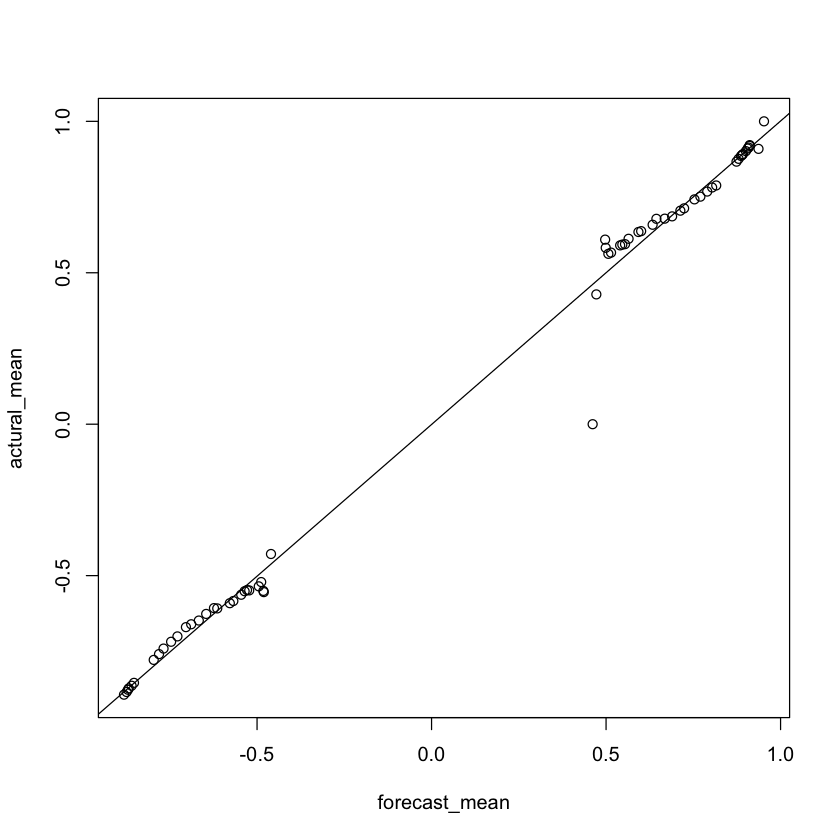

In [149]:
forecast_mean <-c()
actural_mean <- c()
for (i in seq(-1.01,0.99,0.02))
{    
    idx <- forecast>i & forecast<i+0.2
    forecast_mean<-c(forecast_mean, na.omit(mean(na.omit(forecast[idx]))))
    actural_mean <- c(actural_mean,na.omit(mean(na.omit(tradeSign[idx]))))
}
fit<- lm(actural_mean~forecast_mean)
plot(actural_mean~forecast_mean)
abline(fit)
summary(fit)


(c) If the expected order sign is $\hat \epsilon$, what is the probability $p$ that the next trade will be a market buy?

#### Answer

$\hat \epsilon = p+(1-p)*(-1) => p=\frac{1+\epsilon}{2}$